In [18]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from keras.utils.vis_utils import model_to_dot

print(tf.__version__)

2.3.0


In [19]:
# labelNames = ['nsleeve', 'ssleeve', 'lsleeve', 'jsuit', 'collar', 'hood', 'coat', 'jacket', 'lpadding', 'spadding', 'cardigan', 'vest', 'spants', 'lpants', 'skirt']
# labelNames = ['0_0', '0_1', '0_2', '0_3_l', '0_3_s', '0_4_l', '0_4_s', '0_5', '0_6', '0_7',
#              '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12', '1_13', '1_14', '1_15', '1_16', '1_17',
#              '2_0', '2_1', '2_2', '2_3',
#              '3_0', '3_1', '3_2', '3_3', '3_4', '3_5',
#              '4_0', '4_1', '4_2']
# classMatching = [([0, 11], [1], [2, 5, 6, 7, 8, 9, 10], [12, 13], [14], [3], [4])]
# classDic = { 0:1, 1:2, 2:0, 3:2, 4:1, 5:2, 6:1, 7:2, 8:2, 9:2,
#            10:2, 11:2, 12:2, 13:2, 14:2, 15:2, 16:2, 17:2, 18:2, 19:2, 20:2, 21:2, 22:2, 23:2, 24:2, 25:0, 26:0, 27:2,
#            28:5, 29:5, 30:5, 31:5,
#            32:3, 33:3, 34:3, 35:3, 36:3, 37:3,
#            38:4, 39:4, 40:4}

# classNames = ['nsleeve', 'ssleeve', 'lsleeve', 'pants', 'skirt', 'dress']

# classNames = ['nsleeve', 'vest']

# classNames = ['ssleeve', 'collar']

# classNames = ['sleeve', 'haveCollar', 'padding']
# classNames = ['lsleeve', 'hood', 'cardigan']
# classNames = ['coat', 'jacket', 'collar']
# classNames = ['lpadding', 'spadding']

# classNames = ['lpants', 'spants']

# classNames = ['dress', 'jsuit']

## 이미지 numpy array로 변경하기

In [26]:
def sampling(data, per):
    np.random.seed(123)
    N = len(data)
    sample_n = int(len(data)*per)
    sample = data.take(np.random.permutation(N)[:sample_n])
    return sample

In [28]:
import numpy as np
import pandas as pd

x_train = []
y_train = []
x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(labelNames):

    label = [0 for i in range(len(classNames))]
    label[classDic[idx]] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))
    
    i = 0
    lst = []
    for i in range(len(files)) :
        lst.append(i)
    lst = pd.DataFrame(lst, columns = ['idx'])

    trainSet = lst.apply(sampling, per=0.95)
    trainSet = trainSet.sort_index()

    testSet = lst.drop(lst.index[trainSet.index])
    testSet = testSet.sort_index()

    trainSet = trainSet['idx'].values.tolist()
    testSet = testSet['idx'].values.tolist()
    
    for f in range(len(trainSet)):
        img = cv2.imread(files[trainSet[f]])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data = np.asarray(img)
        
        if f == 0:
            print(label)
            
        x_train.append(data)
        y_train.append(label)
    
    for f in range(len(testSet)):
        img = cv2.imread(files[trainSet[f]])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data = np.asarray(img)
        
        if f == 0:
            print(label)
            
        x_test.append(data)
        y_test.append(label)
        fileNames.append(files[testSet[f]])

# for idx in range(16) :
#     imgDir = dir + '/' + labelNames[idx]
#     files = glob.glob(imgDir+"/*.png")
#     print("파일 길이 : ", len(files))
    
#     for f in files:
#         img = Image.open(f)
#         img = img.convert("RGB")
#         data = np.asarray(img, np.int32)
        
#         label = np.zeros(16)
#         label[idx] = 1
        
#         x.append(data)
#         y.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print("ok", len(x_train), len(x_test))

3_0  파일 길이 :  450
[1, 0]
[1, 0]
3_1  파일 길이 :  450
[1, 0]
[1, 0]
3_2  파일 길이 :  450
[1, 0]
[1, 0]
3_3  파일 길이 :  450
[1, 0]
[1, 0]
3_4  파일 길이 :  450
[0, 1]
[0, 1]
3_5  파일 길이 :  450
[1, 0]
[1, 0]
(2562, 125, 125)
(2562, 2)
(138, 125, 125)
(138, 2)
ok 2562 138


In [85]:
np.savez("imageData", x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)

## 데이터 불러오기

In [86]:
import cv2, os, glob, numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Dense, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

import tensorflow as tf
config = tf.config.experimental

imageLoad = np.load("data.npz")
x_train = imageLoad['x_train']
y_train = imageLoad['y_train']
x_test = imageLoad['x_test']
y_test = imageLoad['y_test']
print(x_train.shape)
print(x_test.shape)

(2562, 125, 125, 3)
(138, 125, 125, 3)


In [57]:
# Normalize data
x_train = x_train.astype(float) / 255
x_train = np.reshape(x_train, (-1, 125, 125, 1))

x_test = x_test.astype(float) / 255
x_test = np.reshape(x_test, (-1, 125, 125, 1))

In [87]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [88]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(2305, 125, 125, 3)
(257, 125, 125, 3)
(138, 125, 125, 3)


## 모델 설계 : CNN

In [89]:
from keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(
    # rotation_range = 30,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

data.fit(x_train)
print(x_train.shape)

(2305, 125, 125, 3)


In [61]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.add(Reshape((2, 2)))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [62]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 125, 125, 32)      320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 15, 15, 64)       

## 모델 설계 : InceptionResnetV2

In [78]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

base_model = InceptionResNetV2(include_top=False, pooling='avg')
outputs = Dense(2, activation='softmax')(base_model.output)
base_model.trainable = True

In [79]:
teacher = Model(base_model.inputs, outputs)
teacher.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

student = Model(base_model.inputs, outputs)
student.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'Model' is not defined

## 모델 설계 : InceptionV3

In [90]:
from keras.applications import VGG19,ResNet50,InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D

In [92]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_shape=(125, 125, 3), classes=y_train.shape[1:])

base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 30

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

ValueError: Input size must be at least 139x139; got `input_shape=(125, 125, 3)`

## Knowledge Distillation

In [73]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [74]:
clone = Sequential()
clone.add(Conv2D(16, (3,3), padding="same", input_shape=x_train.shape[1:], activation='relu'))
clone.add(MaxPooling2D(pool_size=(2,2)))
clone.add(Conv2D(16, (3,3), padding="same", activation='relu'))
clone.add(MaxPooling2D(pool_size=(2,2)))
clone.add(Dropout(0.25))

clone.add(Flatten())
clone.add(Dense(32, activation='relu'))
clone.add(Dropout(0.5))
clone.add(Dense(4, activation='softmax'))
clone.add(Reshape((2, 2)))

clone.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [76]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

# Train and evaluate teacher on data.
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


ValueError: in user code:

    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\stell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer conv2d_451 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape [None, 125, 125, 1]


In [66]:
distiller = Distiller(student=model, teacher=clone)

distiller.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)

# Distill teacher to student
distiller.fit(x_train, y_train, epochs=3)

# Evaluate student on test dataset
distiller.evaluate(x_test, y_test)

Epoch 1/3
73/73 [==============================] - 51s 705ms/step - sparse_categorical_accuracy: 0.8364 - student_loss: 0.5537 - distillation_loss: 2.9274e-04
Epoch 2/3
73/73 [==============================] - 62s 855ms/step - sparse_categorical_accuracy: 0.8364 - student_loss: 0.5537 - distillation_loss: 2.9274e-04
Epoch 3/3
5/5 [==============================] - 1s 115ms/step - sparse_categorical_accuracy: 0.8333 - student_loss: 0.5340


0.8333333134651184

In [68]:
from keras.models import load_model
distiller.save_weights('model_distill_pants.h5')

In [ ]:
# Train student as doen usually
student_scratch.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

# Train and evaluate student trained from scratch.
student_scratch.fit(x_train, y_train, epochs=3)
student_scratch.evaluate(x_test, y_test)

## 모델 성능 확인

In [9]:
history = model.fit(data.flow(x_train, y_train, batch_size=32), epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint, early_stopping])

Epoch 1/100
159/159 [==============================] - ETA: 0s - loss: 0.8487 - accuracy: 0.6700
Epoch 00001: val_loss improved from inf to 0.78872, saving model to ./model\multi_img_classification.model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
159/159 [==============================] - 90s 569ms/step - loss: 0.8487 - accuracy: 0.6700 - val_loss: 0.7887 - val_accuracy: 0.7027
Epoch 2/100
159/159 [==============================] - ETA: 0s - loss: 0.8172 - accuracy: 0.6730
Epoch 00002: val_loss improved from 0.78872 to 0.74111, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
159/159 [==============================] - 91s 573ms/step 

Epoch 22/100
159/159 [==============================] - ETA: 0s - loss: 0.5623 - accuracy: 0.7805
Epoch 00022: val_loss improved from 0.51963 to 0.51728, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
159/159 [==============================] - 91s 572ms/step - loss: 0.5623 - accuracy: 0.7805 - val_loss: 0.5173 - val_accuracy: 0.7965
Epoch 23/100
159/159 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.7805
Epoch 00023: val_loss did not improve from 0.51728
159/159 [==============================] - 86s 543ms/step - loss: 0.5496 - accuracy: 0.7805 - val_loss: 0.5267 - val_accuracy: 0.8071
Epoch 24/100
159/159 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.7891
Epoch 00024: val_loss improved from 0.51728 to 0.50601, saving model to ./model\multi_img_classification.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification.model\assets
159

In [10]:
print("정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

10/10 [==============================] - 1s 105ms/step - loss: 0.4623 - accuracy: 0.8284
정확도 : 0.8284


In [11]:
from keras.models import load_model
model.save('modelLsleeve_haveCollar83.h5')

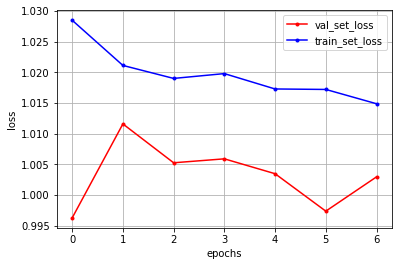

In [49]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

## test data 확인

In [15]:
labelNames = ['1_1', '1_2', '1_3', '1_4', '1_6', '1_7', '1_8', '1_9', '1_17']
# labelNames = ['1_10', '1_11', '1_12']
# labelNames = ['1_13', '1_14']
classNames = ['jacket', 'coat', 'padding']

dir = "C:/Users/stell/Documents/graduation/image_sample"

In [17]:
import numpy as np
import pandas as pd

x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(labelNames):

    label = [0 for i in range(len(classNames))]
    label[0] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.png")
    print(cat, " 파일 길이 : ", len(files))

    for f in files:
        img = Image.open(f)
        img = img.convert("RGB")
        data = np.asarray(img)
            
        x_test.append(data)
        y_test.append(label)
        fileNames.append(f)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)
print(y_test.shape)

print("ok", len(x_test))

1_1  파일 길이 :  450
1_2  파일 길이 :  450
1_3  파일 길이 :  450
1_4  파일 길이 :  450
1_6  파일 길이 :  450
1_7  파일 길이 :  450
1_8  파일 길이 :  450
1_9  파일 길이 :  420
1_17  파일 길이 :  450
(4020, 125, 125, 3)
(4020, 3)
ok 4020


In [18]:
np.savez("LHC_test", x_test = x_test, y_test = y_test)

In [19]:
imageLoad = np.load("LHC_test.npz")
x_test = imageLoad['x_test']
y_test = imageLoad['y_test']
print(x_test.shape)

x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

(4020, 125, 125, 3)


In [20]:
from PIL import Image
import os, glob, numpy as np
from tensorflow.keras.models import load_model
model = load_model('modelRawLHC82.h5')

prediction = model.predict(x_test)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print("해당 "+fileNames[cnt].split("\\")[0]+"이미지는 "+classNames[pre_ans]+"로 추정됩니다.")
    cnt += 1
    print("="*40)

KeyboardInterrupt: 